#### Key points from the dataset inspection

Dataset Shape and Columns: The dataset has 4388 samples and 16 columns, with the last column "Subject" being the target variable.
- Missing Values: There are a few missing values in columns "Std Dev_X", "Std Dev_Y", and "Std Dev_Mixed" (5 missing values each).
- Features: All columns except "Subject".
- Target: "Subject" with values ranging from 1 to 5.

Given these details, here are some steps we can take to improve the model:

- Handle Missing Values: Replace missing values or remove rows with missing values.
- Data Normalization: Normalize the input features for better model performance.
- Model Architecture: Adjust the neural network architecture if necessary.
- Train-Test Split: Split the data into training and validation sets to evaluate the model performance more reliably.

Let's implement step by step.

Step 1: Handle Missing Values
We'll fill the missing values with the mean of the respective columns.

Step 2: Normalize the Data
We'll normalize the features to have values between 0 and 1.

Step 3: Split the Data
We'll split the data into training and validation sets (e.g., 80% training, 20% validation).

Step 4: Update the Model
We'll adjust the model architecture if needed and train it using the training set while validating on the validation set.

#### model (model for k-fold cross validation)
This model is used during the K-fold cross-validation process. The purpose of using this model is to evaluate its performance on different splits of the training/validation data to ensure that the model is not `overfitting` and has good generalization performance. Each fold in the K-fold cross-validation involves training a new model from scratch and evaluating it on the validation fold, hence multiple instances of the model are created and trained.

- K-fold Cross-Validation: This technique involves splitting the training data into k folds. For each fold, the model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, each time with a different validation fold. The average performance across all folds gives an estimate of how the model will perform on unseen data.
- The model created within the cross-validation loop is used to: Train on the training part of the data for that fold. Evaluate on the validation part of the data for that fold. After each fold, the performance metrics (accuracy and loss) are stored for later analysis.

##### final_model (same model for training if the k-fold cross validation exhibits good performance)
After completing the K-fold cross-validation, a final model is trained on the entire training/validation set (X_train_val, y_train_val). This model is intended to leverage all the available data to learn the patterns as effectively as possible. This final model is then evaluated on the separate test set to get an estimate of its performance on truly unseen data.

- Final Training: The final_model is trained using all the training/validation data because K-fold cross-validation has already provided an estimate of model performance and helped to ensure that the model is not overfitting.

#### Following metrics are used for performance evaluation

- Accuracy: This is the primary metric used for evaluating the model's performance in this code. Accuracy is the ratio of correctly predicted instances to the total instances in the dataset. It is calculated both for the training/validation splits during K-fold cross-validation and for the final evaluation on the test set.

- Loss: The loss function used in this code is categorical_crossentropy. Loss measures how well the model's predictions match the true labels. It is calculated during both the training and validation phases within the K-fold cross-validation, and also during the final training and evaluation on the test set.

#### Deciding hyperparameters
Deciding hyperparameters such as the learning rate in the TensorFlow Sequential API is a crucial step in building and training a neural network. Here are common approaches and techniques used to select and optimize hyperparameters

- Adaptive learning rate

## Back-Propagation

The core components used in the backpropagation process for training neural networks include the loss function, the learning rate, and the gradient of the loss function with respect to the model parameters (weights and biases)

#### Deciding a loss function

1. Interpretability with Probabilistic Outputs
- Probabilistic Interpretation: Cross-entropy loss is well-suited for tasks where the output of the model represents probabilities. It measures the difference between the true probability distribution (the true labels) and the predicted probability distribution (the model's predictions).
- Log-Likelihood: Cross-entropy loss is equivalent to the negative log-likelihood of the true labels given the predictions, making it directly related to maximizing the likelihood of the correct class labels.

2. Effective Gradient Computation
- Smooth Gradients: Cross-entropy loss provides smooth gradients that are conducive to efficient gradient-based optimization methods like gradient descent. This smoothness helps in faster and more stable convergence during training.
- Gradient Magnitude: The gradients of the cross-entropy loss function do not suffer from the vanishing gradient problem as much as other loss functions (e.g., mean squared error in classification tasks), especially when combined with activation functions like softmax.

3. Alignment with Softmax Activation
- Softmax Activation Compatibility: When using softmax activation in the output layer, the outputs are normalized to represent probabilities. Cross-entropy loss is the natural choice as it directly compares these predicted probabilities with the true one-hot encoded labels.
- Mutual Information Maximization: The combination of softmax activation and cross-entropy loss maximizes the mutual information between the input and the output distributions, leading to better discrimination between classes.

4. Mathematical Properties
- Convexity: In many cases, the cross-entropy loss function is convex with respect to the model parameters when combined with the softmax activation function, making optimization more straightforward and reliable.
- Information Theory Basis: Cross-entropy comes from information theory, where it measures the "distance" between two probability distributions. In the context of machine learning, this distance corresponds to the difference between the true labels and the predicted probabilities.

5. Empirical Performance
- Proven Effectiveness: Cross-entropy loss has been empirically proven to work well for a wide range of classification tasks in machine learning and deep learning. Its effectiveness has been demonstrated across various domains, from image classification to natural language processing.

#### ADAM optimizer
- The Adam optimizer (short for Adaptive Moment Estimation) is an advanced optimization algorithm that combines ideas from both Adaptive Gradient Algorithm (Adagrad) and Root Mean Square Propagation (RMSprop). Although it uses concepts from Stochastic Gradient Descent (SGD), Adam incorporates adaptive learning rates and momentum to improve performance and convergence.
- The Adam optimizer, like other optimization algorithms, fundamentally relies on calculating the gradient of the loss function with respect to the model's weights. This gradient represents the rate of change of the loss function with respect to the weights, and it is used to update the weights in a direction that minimizes the loss. This process is part of backpropagation.

### Add why I use cross entropy

c:\Users\Eshan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 Validation Accuracy: 82.91%
Fold 2 Validation Accuracy: 81.48%
Fold 3 Validation Accuracy: 82.62%
Fold 4 Validation Accuracy: 82.91%
Fold 5 Validation Accuracy: 78.92%
Fold 6 Validation Accuracy: 76.35%
Fold 7 Validation Accuracy: 80.06%
Fold 8 Validation Accuracy: 81.77%
Fold 9 Validation Accuracy: 79.20%
Fold 10 Validation Accuracy: 78.92%
Mean Validation Accuracy: 80.51% (+/- 2.07%)
Test Set Accuracy: 78.59%
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Figure size 1200x600 with 0 Axes>

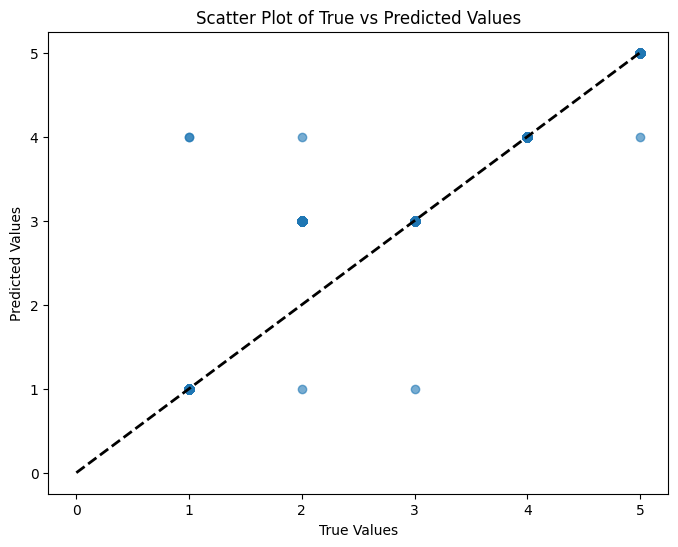

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Dataset/combined_metrics.csv')

# Step 1: Handle missing values by filling with column mean
data.fillna(data.mean(), inplace=True)

# Step 2: Split data into features (X) and target (y)
X = data.drop('category', axis=1).values
y = data['category'].values

# One-hot encode labels
num_classes = 5
y_categorical = to_categorical(y - 1, num_classes)  # Subtract 1 to get labels in range [0, 4]

# Split the data into training/validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to hold the results
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
history_list = []

# Perform the cross-validation
for fold, (train, val) in enumerate(kfold.split(X_train_val, y_train_val)):
    # Create the model
    model = Sequential([
        Dense(64, input_dim=X_train_val.shape[1], activation='relu'),  # Input layer and first hidden layer
        Dense(128, activation='relu'),  # Second hidden layer
        Dense(64, activation='relu'),  # Third hidden layer
        Dense(num_classes, activation='softmax')  # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model and store the history
    history = model.fit(X_train_val[train], y_train_val[train], epochs=100, batch_size=32, 
                        validation_data=(X_train_val[val], y_train_val[val]), verbose=0)
    
    history_list.append(history)
    
    # Evaluate the model
    train_score = model.evaluate(X_train_val[train], y_train_val[train], verbose=0)
    val_score = model.evaluate(X_train_val[val], y_train_val[val], verbose=0)

    # Store accuracy and loss for each fold
    train_accuracies.append(train_score[1] * 100)
    val_accuracies.append(val_score[1] * 100)
    train_losses.append(train_score[0])
    val_losses.append(val_score[0])

    print(f'Fold {fold + 1} Validation Accuracy: {val_score[1] * 100:.2f}%')

# Print the average validation accuracy across all folds
print(f'Mean Validation Accuracy: {np.mean(val_accuracies):.2f}% (+/- {np.std(val_accuracies):.2f}%)')

# Evaluate the final model on the test set
final_model = Sequential([
    Dense(64, input_dim=X_train_val.shape[1], activation='relu'),  # Input layer and first hidden layer
    Dense(128, activation='relu'),  # Second hidden layer
    Dense(64, activation='relu'),  # Third hidden layer
    Dense(num_classes, activation='softmax')  # Output layer
])

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
final_model.fit(X_train_val, y_train_val, epochs=100, batch_size=32, verbose=0)
test_scores = final_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Set Accuracy: {test_scores[1] * 100:.2f}%')

# Plot the results for each fold
folds = np.arange(1, 11)
plt.figure(figsize=(12, 6))

# Predict on the test set
y_pred = final_model.predict(X_test)

# Convert predictions and true values from one-hot encoded to class labels
y_test_classes = np.argmax(y_test, axis=1) + 1
y_pred_classes = np.argmax(y_pred, axis=1) + 1

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_classes, y_pred_classes, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.plot([0, num_classes], [0, num_classes], 'k--', lw=2)  # Diagonal line for reference
plt.show()

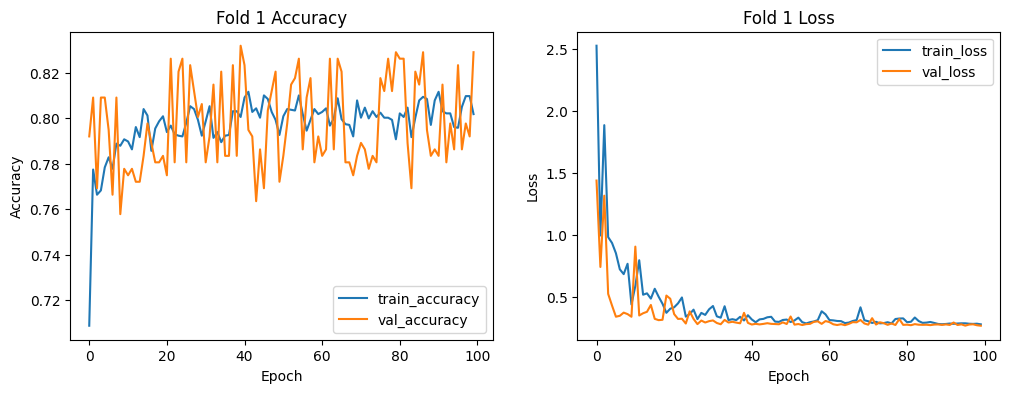

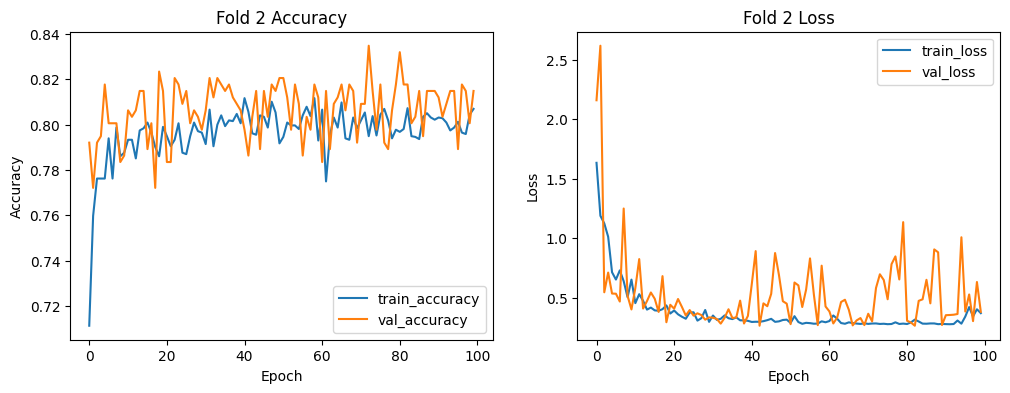

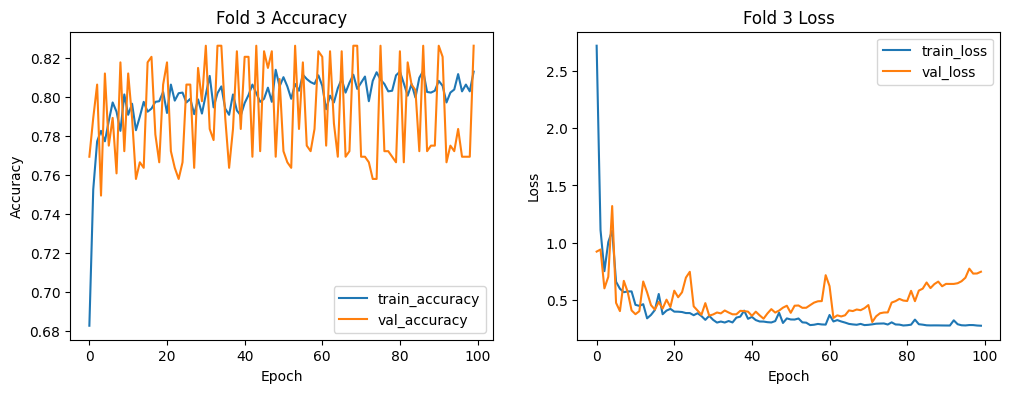

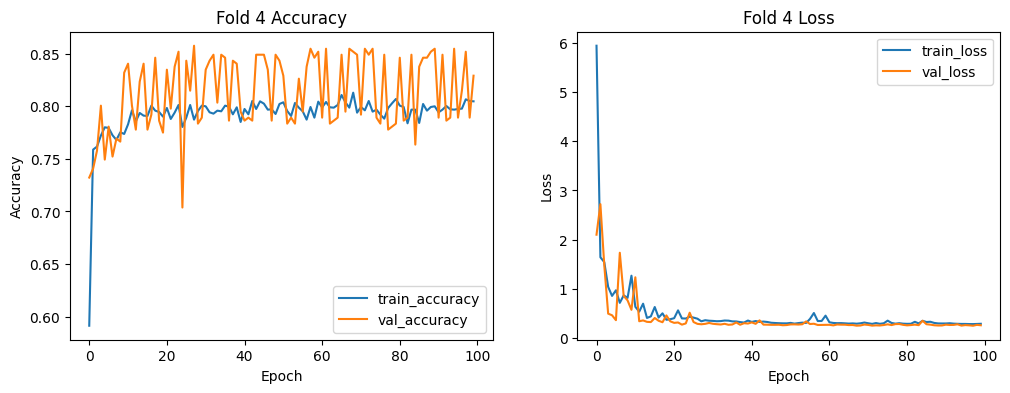

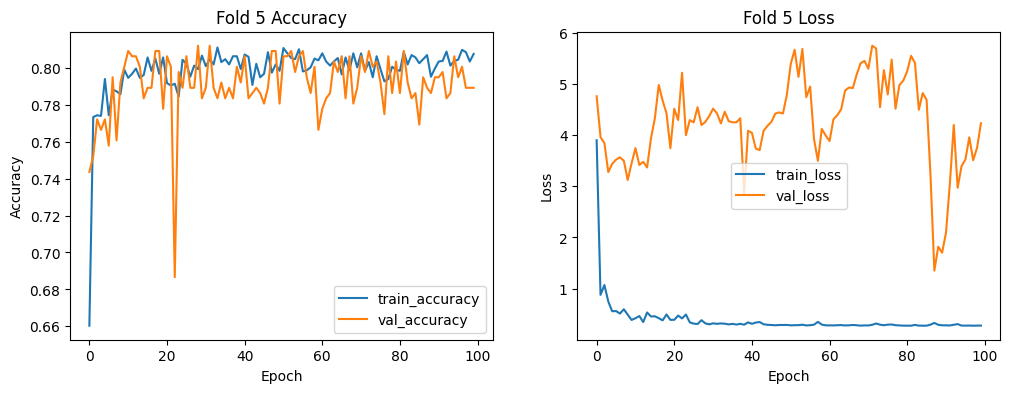

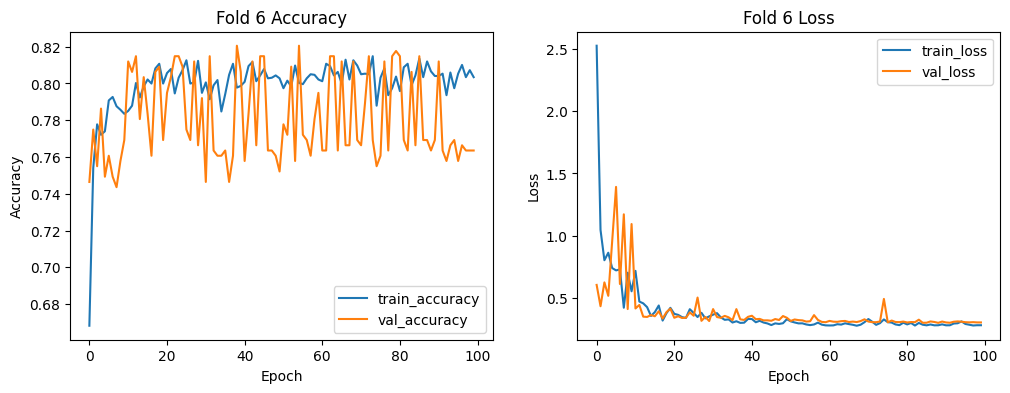

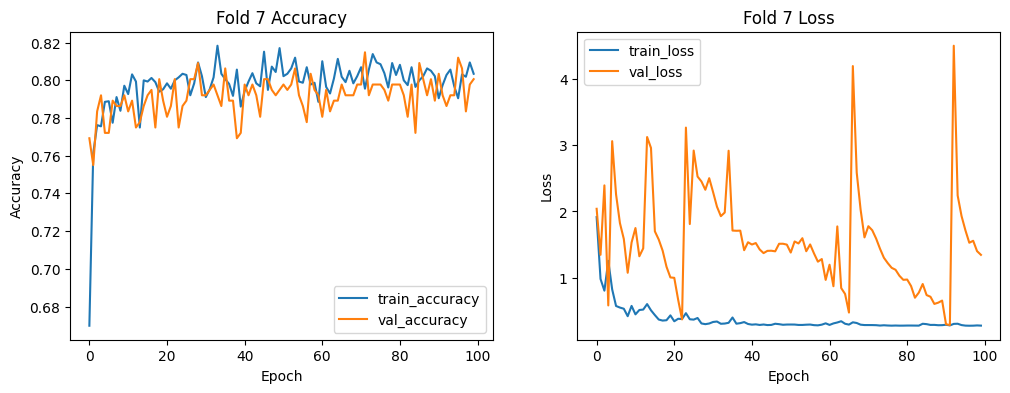

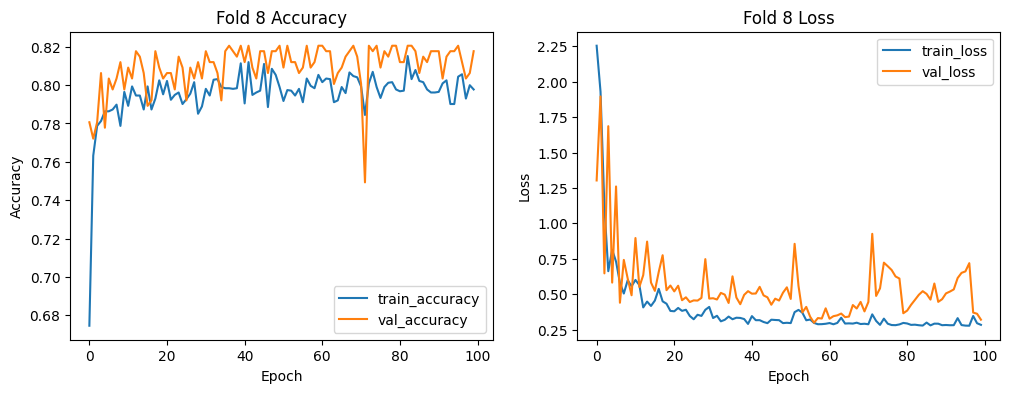

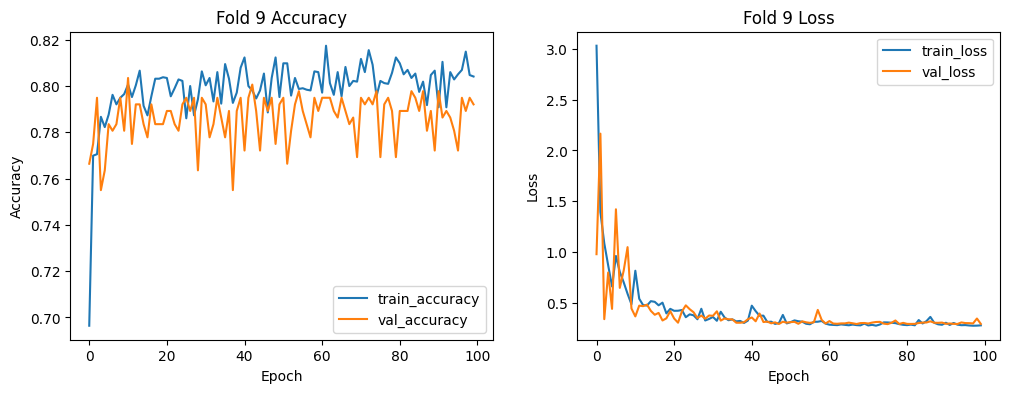

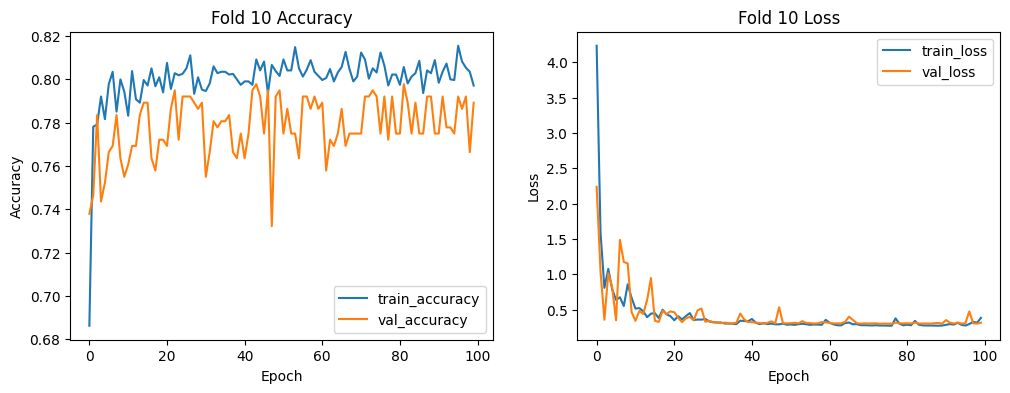

In [9]:
# Plot the results for each fold
for i, history in enumerate(history_list):
    # Accuracy plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'Fold {i + 1} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Fold {i + 1} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

`There is no big difference in between train and validation accuracies. So, the model may not overfit.`